In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

In [2]:
df = pd.read_csv("Most Streamed Spotify Songs 2024.csv", encoding='latin1')

In [3]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
numeric_columns = ['Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Reach', 'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts']
df[numeric_columns] = df[numeric_columns].replace(',', '', regex=True).apply(pd.to_numeric)
df['All Time Rank'] = pd.to_numeric(df['All Time Rank'].replace(',', '', regex=True), downcast='integer')
df['Explicit Track'] = df['Explicit Track'].replace({0: False, 1: True}).astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4600 non-null   object        
 1   Album Name                  4600 non-null   object        
 2   Artist                      4595 non-null   object        
 3   Release Date                4600 non-null   datetime64[ns]
 4   ISRC                        4600 non-null   object        
 5   All Time Rank               4600 non-null   int16         
 6   Track Score                 4600 non-null   float64       
 7   Spotify Streams             4487 non-null   float64       
 8   Spotify Playlist Count      4530 non-null   float64       
 9   Spotify Playlist Reach      4528 non-null   float64       
 10  Spotify Popularity          3796 non-null   float64       
 11  YouTube Views               4292 non-null   float64     

/var/folders/pf/k196hws969g1q7_pkdnv68ww0000gn/T/ipykernel_74777/1487686018.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Explicit Track'] = df['Explicit Track'].replace({0: False, 1: True}).astype('category')


In [4]:
# Fill missing data points with np.NaN so that they do not affect any calculations

df = df.fillna(np.nan)

In [5]:
# Drop irrelevant columns (keep Shazam Counts though!)

df_spotify = df.drop(columns=['TIDAL Popularity', 'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Count', 'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams'])
df_spotify['Release Year'] = df_spotify['Release Date'].dt.year

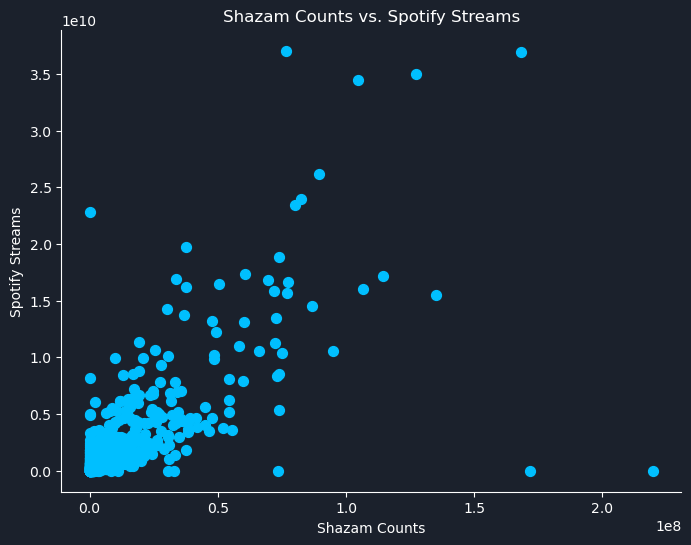

In [6]:
# Initial scatter plot

agg_data = df_spotify.groupby('Artist').agg({'Shazam Counts': 'sum', 'Spotify Streams': 'sum'}).reset_index()
top_artists = agg_data.nlargest(10, 'Shazam Counts')

fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(agg_data['Shazam Counts'], agg_data['Spotify Streams'], color='deepskyblue', s=50)

ax.set_xlabel('Shazam Counts', color='white')
ax.set_ylabel('Spotify Streams', color='white')
ax.set_title('Shazam Counts vs. Spotify Streams', color='white')

ax.tick_params(axis='both', colors='white')

fig.patch.set_facecolor('#1B212C')
ax.set_facecolor('#1B212C')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

plt.show()

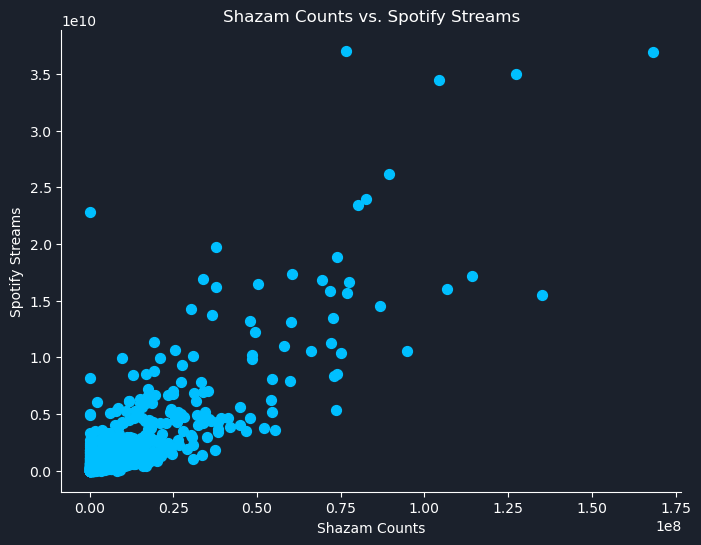

In [7]:
# Removing high Shazam/low Spotify outliers

shazam_threshold = 10000
spotify_threshold = 1000

outliers = (agg_data['Shazam Counts'] > shazam_threshold) & (agg_data['Spotify Streams'] < spotify_threshold)
cleaned_df = agg_data[~outliers]

fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(cleaned_df['Shazam Counts'], cleaned_df['Spotify Streams'], color='deepskyblue', s=50)

ax.set_xlabel('Shazam Counts', color='white')
ax.set_ylabel('Spotify Streams', color='white')
ax.set_title('Shazam Counts vs. Spotify Streams', color='white')

ax.tick_params(axis='both', colors='white')

fig.patch.set_facecolor('#1B212C')
ax.set_facecolor('#1B212C')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

plt.show()

/var/folders/pf/k196hws969g1q7_pkdnv68ww0000gn/T/ipykernel_74777/3224454173.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df_2['Colors'] = np.select(conditions, colors, default='deepskyblue')
/var/folders/pf/k196hws969g1q7_pkdnv68ww0000gn/T/ipykernel_74777/3224454173.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df_2['SpecialColors'] = cleaned_df_2['Colors']


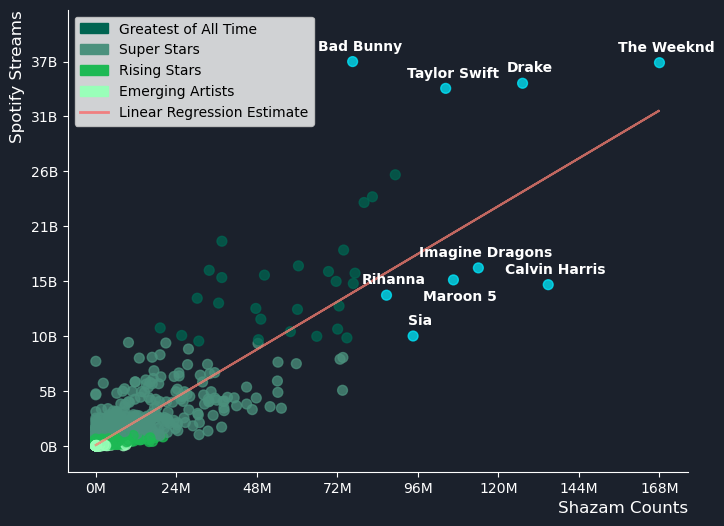

In [8]:
# Scatter plot with all relevant details included - to be used in final presentation slides.

shazam_threshold_2 = 25000000
spotify_threshold_2 = 15000000000

big_nums = (cleaned_df['Shazam Counts'] < shazam_threshold_2) & (cleaned_df['Spotify Streams'] > spotify_threshold_2)
cleaned_df_2 = cleaned_df[~big_nums] # Remove remaining outlier(s) (high Spotify/low Shazam - 'MUSIC LB JPN')

goats = cleaned_df_2['Spotify Streams'] >= 10000000000
super_stars = (cleaned_df_2['Spotify Streams'] < 10000000000) & (cleaned_df_2['Spotify Streams'] >= 1000000000)
rising_stars = (cleaned_df_2['Spotify Streams'] < 1000000000) & (cleaned_df_2['Spotify Streams'] >= 100000000)
emerging_artists = (cleaned_df_2['Spotify Streams'] < 100000000)

conditions = [goats, super_stars, rising_stars, emerging_artists]
colors = ['#006451', '#4B917D', '#1DB954', '#99FFB9']
# colors = ['#99FFB9', '#1DB954', '#4B917D', '#006451']
labels = ['Greatest of All Time', 'Super Stars', 'Rising Stars', 'Emerging Artists']
cleaned_df_2['Colors'] = np.select(conditions, colors, default='deepskyblue')

cleaned_df_2['SpecialColors'] = cleaned_df_2['Colors']
top_shazam_df_3 = cleaned_df_2.nlargest(9, 'Shazam Counts')
top_10_combined_color = '#00eaff'
cleaned_df_2.loc[top_shazam_df_3.index, 'SpecialColors'] = top_10_combined_color

eighth_largest_index = top_shazam_df_3.index[7]
cleaned_df_2.at[eighth_largest_index, 'SpecialColors'] = cleaned_df_2.at[eighth_largest_index, 'Colors']

top_shazam_df = cleaned_df_2.nlargest(4, 'Spotify Streams')
top_10_emerging_color = '#00eaff'
cleaned_df_2.loc[top_shazam_df.index, 'SpecialColors'] = top_10_emerging_color

fig, ax = plt.subplots(figsize=(8, 6))
x = cleaned_df_2['Shazam Counts']
y = cleaned_df_2['Spotify Streams']
scatter = ax.scatter(x, y, color = cleaned_df_2['SpecialColors'], s=50, alpha = 0.75)

slope, intercept = np.polyfit(x, y, 1)
ax.plot(x, (slope * x) + intercept, color = 'salmon', label = 'Linear Regression Estimate', alpha = 0.75)

x_min, x_max = cleaned_df_2['Shazam Counts'].min(), cleaned_df_2['Shazam Counts'].max()
y_min, y_max = cleaned_df_2['Spotify Streams'].min(), cleaned_df_2['Spotify Streams'].max()

x_interval = (x_max - x_min) / 7  # Adjust the divisor for more or fewer ticks
y_interval = (y_max - y_min) / 7  # Adjust the divisor for more or fewer ticks

x_ticks = np.arange(x_min, x_max + x_interval, x_interval)
x_labels = [f'{int(x/1e6)}M' for x in x_ticks]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, size = 10)

y_ticks = np.arange(y_min, y_max + y_interval, y_interval)
y_labels = [f'{int(y/1e9)}B' for y in y_ticks]
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels, size = 10)

ax.set_ylim(y_min - 2500000000, y_max + 5000000000)
# ax.set_xlim(x_min - 2500000000, x_max + 2500000000)

top_artists = ['Bad Bunny', 'Taylor Swift', 'Drake', 'The Weeknd', 'Calvin Harris', 'Imagine Dragons', 'Maroon 5', 'Rihanna', 'Sia']
top_artists_df = cleaned_df_2[cleaned_df_2['Artist'].isin(top_artists)]

for artist in top_artists:
    artist_data = cleaned_df_2[cleaned_df_2['Artist'] == artist]
    for i, row in artist_data.iterrows():
        if row['Artist'] == 'Maroon 5':
            ax.annotate(row['Artist'], (row['Shazam Counts'], row['Spotify Streams']),
                        textcoords="offset points", xytext=(5, -15), ha='center', color='white', fontweight = 'bold')
        else:
            ax.annotate(row['Artist'], (row['Shazam Counts'], row['Spotify Streams']),
                        textcoords="offset points", xytext=(5, 8), ha='center', color='white', fontweight = 'bold')

ax.set_xlabel('Shazam Counts', color='white', size=12, loc = 'right')
ax.set_ylabel('Spotify Streams', color='white', size=12, loc = 'top')
ax.tick_params(axis='both', colors='white')

fig.patch.set_facecolor('#1B212C')
ax.set_facecolor('#1B212C')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

handles = [mpatches.Patch(color=col, label=label) for col, label in zip(colors, labels)]
handles.append(Line2D([0], [0], color='lightcoral', lw=2, label='Linear Regression Estimate'))
ax.legend(handles=handles, loc='best')

/var/folders/pf/k196hws969g1q7_pkdnv68ww0000gn/T/ipykernel_74777/1284039612.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_df_3 = cleaned_df_2[~big_nums_2]
/var/folders/pf/k196hws969g1q7_pkdnv68ww0000gn/T/ipykernel_74777/1284039612.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emerging_and_rising_df['SpecialColors'] = cleaned_df_3['Colors']


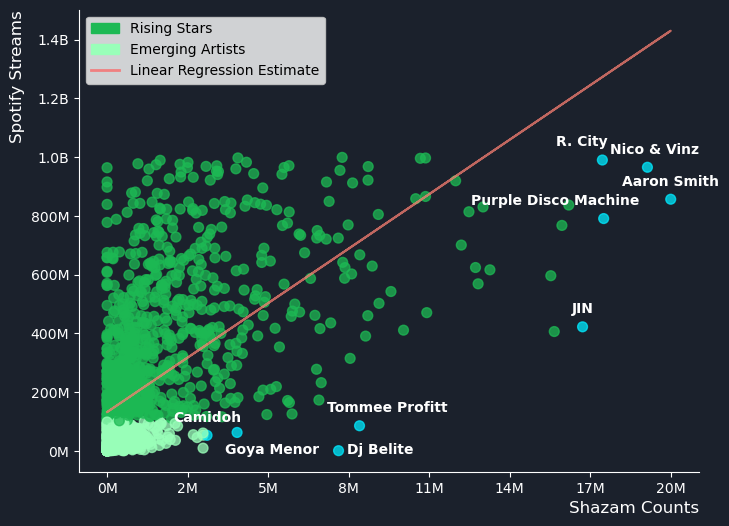

In [9]:
# Scatter plot of only the emerging and rising artists (less than 1B streams). Also to be included in the final presentation slides.

big_nums_2 = (cleaned_df['Spotify Streams'] > 30000000000)
cleaned_df_3 = cleaned_df_2[~big_nums_2]
indices_to_remove = [1989, 1992]  # Removing outliers
cleaned_df_3 = cleaned_df_3.drop(indices_to_remove)

emerging_and_rising = (cleaned_df_3['Spotify Streams'] < 1000000000)
rising_stars2 = (cleaned_df_3['Spotify Streams'] < 1000000000) & (cleaned_df_3['Spotify Streams'] >= 100000000)
emerging_artists2 = (cleaned_df_3['Spotify Streams'] < 100000000)

conditions = [rising_stars2, emerging_artists2]
colors = ['#1DB954', '#99FFB9']
labels = ['Rising Stars', 'Emerging Artists']
cleaned_df_3['Colors'] = np.select(conditions, colors, default='deepskyblue')
emerging_and_rising_df = cleaned_df_3[emerging_and_rising]

emerging_and_rising_df['SpecialColors'] = cleaned_df_3['Colors']
top_shazam_df_3 = emerging_and_rising_df.nlargest(5, 'Shazam Counts')
top_10_combined_color = '#00eaff'
emerging_and_rising_df.loc[top_shazam_df_3.index, 'SpecialColors'] = top_10_combined_color

top_shazam_emerging_df = cleaned_df_3[emerging_artists2].nlargest(4, 'Shazam Counts')
top_10_emerging_color = '#00eaff'
emerging_and_rising_df.loc[top_shazam_emerging_df.index, 'SpecialColors'] = top_10_emerging_color

fig, ax = plt.subplots(figsize=(8, 6))
x = emerging_and_rising_df['Shazam Counts']
y = emerging_and_rising_df['Spotify Streams']
scatter = ax.scatter(x, y, color = emerging_and_rising_df['SpecialColors'], s=50, alpha = 0.75)

slope, intercept = np.polyfit(x, y, 1)
ax.plot(x, (slope * x) + intercept, color = 'salmon', label = 'Linear Regression Estimate', alpha = 0.75)

x_min, x_max = emerging_and_rising_df['Shazam Counts'].min(), emerging_and_rising_df['Shazam Counts'].max()
y_min, y_max = emerging_and_rising_df['Spotify Streams'].min(), emerging_and_rising_df['Spotify Streams'].max() + 401000000

x_interval = (x_max - x_min) / 7  # Adjust the divisor for more or fewer ticks
y_interval = (y_max - y_min) / 7  # Adjust the divisor for more or fewer ticks

x_ticks = np.arange(x_min, x_max + x_interval, x_interval)
x_labels = [f'{int(x/1e6)}M' for x in x_ticks]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, size = 10)

y_ticks = np.arange(y_min, y_max + y_interval, y_interval)
y_labels = [f'{int(y/1e6)}M' if y < 1e9 else f'{y/1e9:.1f}B' for y in y_ticks]
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels, size = 10)

ax.set_xlabel('Shazam Counts', color='white', size=12, loc = 'right')
ax.set_ylabel('Spotify Streams', color='white', size=12, loc = 'top')

ax.tick_params(axis='both', colors='white')

fig.patch.set_facecolor('#1B212C')
ax.set_facecolor('#1B212C')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

top_shazam_df_3 = emerging_and_rising_df.nlargest(5, 'Shazam Counts')
for i, row in top_shazam_df_3.iterrows():
    if row['Artist'] == 'Purple Disco Machine':
        ax.annotate(row['Artist'], (row['Shazam Counts'], row['Spotify Streams']),
                        textcoords="offset points", xytext=(-35, 10), ha='center', color='white', fontweight = 'bold')
    elif row['Artist'] == 'R. City':
        ax.annotate(row['Artist'], (row['Shazam Counts'], row['Spotify Streams']),
                        textcoords="offset points", xytext=(-15, 10), ha='center', color='white', fontweight = 'bold')
    elif row['Artist'] == 'Nico & Vinz':
        ax.annotate(row['Artist'], (row['Shazam Counts'], row['Spotify Streams']),
                        textcoords="offset points", xytext=(5, 10), ha='center', color='white', fontweight = 'bold')
    else:
        ax.annotate(row['Artist'], (row['Shazam Counts'], row['Spotify Streams']),
                textcoords="offset points", xytext=(0,10), ha='center', color='white', fontweight = 'bold')

top_shazam_emerging_df = cleaned_df_3[emerging_artists2].nlargest(4, 'Shazam Counts')
for i, row in top_shazam_emerging_df.iterrows():
    if row['Artist'] == 'Goya Menor':
        ax.annotate(row['Artist'], (row['Shazam Counts'], row['Spotify Streams']),
                        textcoords="offset points", xytext=(25, -15), ha='center', color='white', fontweight = 'bold')
    elif row['Artist'] == 'Camidoh':
        ax.annotate(row['Artist'], (row['Shazam Counts'], row['Spotify Streams']),
                        textcoords="offset points", xytext=(0, 10), ha='center', color='white', fontweight = 'bold')
    elif row['Artist'] == 'ALEX&RUS':
        ax.annotate(row['Artist'], (row['Shazam Counts'], row['Spotify Streams']),
                        textcoords="offset points", xytext=(5, 10), ha='center', color='white', fontweight = 'bold')
    elif row['Artist'] == 'Dj Belite':
        ax.annotate(row['Artist'], (row['Shazam Counts'], row['Spotify Streams']),
                        textcoords="offset points", xytext=(30, -2), ha='center', color='white', fontweight = 'bold')
    else:
        ax.annotate(row['Artist'], (row['Shazam Counts'], row['Spotify Streams']),
                textcoords="offset points", xytext=(20, 10), ha='center', color='white', fontweight = 'bold')

handles = [mpatches.Patch(color=col, label=label) for col, label in zip(colors, labels)]
handles.append(Line2D([0], [0], color='lightcoral', lw=2, label='Linear Regression Estimate'))
ax.legend(handles=handles, loc='best')